# Superconducting Qubit Refrigerator: Paper Plots
This Jupyter Notebook produces all plots in the manuscript relative to the superconducting qubit refrigerator if the ```paper_plot_data``` was downloaded. Such data can alternatively be generated using ```0_train.ipynb``` and ```1_produce_pareto.ipynb```. For details on the system, see ```0_train.ipynb```.
#### Import modules

In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker
from matplotlib.lines import Line2D
from pathlib import Path
import plotting

## Produce Fig. 3

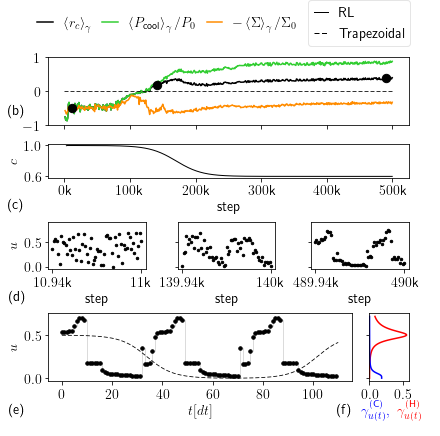

In [36]:
log_dir = "../paper_plot_data/qubit_refrigerator/pareto/2022_01_28-15_42_10_aend=0.6"

det_policy_sublocation = "saved_policies/det_policy.txt"
actions_to_plot_large = 110
actions_to_plot_small = 61
small_line_style = "scatter"
large_line_style = "scatter_plot"
small_linewidth=6.
large_linewidth=12.
actions_per_log = 1000
act_0 = 11000-1
act_1 = 140000-1
act_2 = 490000-1
small_action_ylim = [-0.05, 0.91]
large_action_ylim = None 
reward_ylabel= r""
reward_labels = [r"$\ev*{r_c}_\gamma$",r"$\ev*{{P}_\text{cool}}_\gamma/P_0$",
                                                         r"$-\ev*{\Sigma}_\gamma/\Sigma_0$",""]
reward_extra_coeffs = [1.,1.,1.]
reward_label_location = [-0.045, 1.28]
reward_colors = ["black","limegreen","darkorange"]
cycle_custom_colors = ["black"]
reward_plot_extra_args = ([0,500000], [0.00149926,0.00149926])
reward_plot_extra_kwargs = dict(color='black',linewidth=0.8, dashes=(4/0.8,2/0.8))
extra_cycles = [lambda x,a=2,omega=0.0472428,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth = 0.8
rl_legend_lines=[Line2D([0], [0], color='black', linewidth=1), 
                    Line2D([0], [0], color='black', linewidth=1, dashes=(4/0.8,2/0.8))]
rl_legend_text=["RL","Trapezoidal"]
rl_legend_location=[0.7,0.893]
legend_column_spacing = 0.8
plot_file_name = "fig_3.pdf"

#get location of files
running_reward_file, running_loss_file, running_multi_obj_file, actions_file = \
                                plotting.log_sac_file_locations(log_dir, None,None,None,None)

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath,amssymb,physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,5.9))
gs = gridspec.GridSpec(4, 4, figure=fig, height_ratios=[1,0.5,0.7,1], width_ratios=[0.5,0.5,0.301,0.2])
reward_ax = fig.add_subplot(gs[0, :])
cvalue_ax = fig.add_subplot(gs[1, :],sharex=reward_ax)
prot_0_ax = fig.add_subplot(gs[2, 0])
prot_1_ax = fig.add_subplot(gs[2, 1],sharey=prot_0_ax)
prot_2_ax = fig.add_subplot(gs[2, 2:],sharey=prot_0_ax)
prot_final_ax = fig.add_subplot(gs[3, 0:3])
coupling_ax = fig.add_subplot(gs[3, 3], sharey=prot_final_ax)
plt.setp(reward_ax.get_xticklabels(), visible=False)   
plt.setp(prot_1_ax.get_yticklabels(), visible=False)
plt.setp(prot_2_ax.get_yticklabels(), visible=False)          
plt.setp(coupling_ax.get_yticklabels(), visible=False)          

#Figure of merit curve (panel a)
plotting.plot_running_reward_on_axis(running_reward_file, reward_ax, plot_to_file_line = None,
                                    multi_location=running_multi_obj_file,linewidth=None,
                                    lines_to_mark = [plotting.nearest_int(act_0/actions_per_log),
                                    plotting.nearest_int(act_1/actions_per_log),
                                    plotting.nearest_int(act_2/actions_per_log)], custom_mark_color="black",
                                    custom_mark_size=70, legend_labels=reward_labels,legend_location=reward_label_location,
                                    custom_colors=reward_colors,ylabel=reward_ylabel,legend_cols=3,
                                    extra_coeffs=reward_extra_coeffs,plot_extra_args=reward_plot_extra_args,
                                    plot_extra_kwargs=reward_plot_extra_kwargs,legend_column_spacing=legend_column_spacing,
                                    legend_fancybox=False, legend_framealpha=0.,xlabel="",yticks=[-1,0,1]) 

#Values of c during training (panel b)
plot_data = np.loadtxt(running_loss_file)
cvalue_ax.plot(plot_data[2:,0], plot_data[2:,5], color="black", linewidth=1.)
cvalue_ax.set_xlabel("step")
cvalue_ax.set_ylabel(r"$c$")
cvalue_ax.set_yticks([0.6,1])

#actions during training (panel c)
plotting.plot_actions_on_axis(actions_file, prot_0_ax, actions_to_plot=actions_to_plot_small,
                            is_tri=False, actions_ylim=small_action_ylim,plot_to_file_line=act_0,
                            custom_colors=cycle_custom_colors, linewidth = small_linewidth,
                            two_xticks=True, line_style=small_line_style)
plotting.plot_actions_on_axis(actions_file, prot_1_ax, actions_to_plot=actions_to_plot_small,
                            is_tri=False,plot_to_file_line=act_1,ylabel="",custom_colors=cycle_custom_colors,
                            linewidth = small_linewidth,two_xticks=True, line_style=small_line_style)
plotting.plot_actions_on_axis(actions_file, prot_2_ax, actions_to_plot=actions_to_plot_small,
                            is_tri=False,plot_to_file_line=act_2, ylabel="",custom_colors=cycle_custom_colors,
                            linewidth = small_linewidth, two_xticks=True, line_style=small_line_style)

#final deterministic cycle (panel d)
plotting.plot_actions_on_axis(os.path.join(log_dir, det_policy_sublocation), prot_final_ax,
                            actions_to_plot=actions_to_plot_large, is_tri=False, actions_ylim=large_action_ylim,
                            plot_to_file_line=None, custom_colors=cycle_custom_colors, line_style=large_line_style,
                            k_notation=False, x_count_from_zero=True, linewidth = large_linewidth, xlabel="$t[dt]$",
                            extra_cycles=extra_cycles, extra_cycles_linewidth=extra_cycles_linewidth)

#coupling strength functions (panel e)
s = lambda de, b, w: g/2 * 1/(1 + q**2*(de/w - w/de)**2)*de/(np.exp(b*de) - 1)
s_tot = lambda de, b, w: s(de,b,w)+s(-de,b,w)
s_hot = lambda de: s_tot(de,bh,wh)
s_cold = lambda de: s_tot(de,bc,wc)
de = lambda u: 2*e0*np.sqrt(d**2 + u**2);
g = 1;q = 4;e0 = 1;d = 0.12;wh = 1.03;wc = 0.24;bh = 10/3;bc = 2*bh;ec = 0.24;
u_vals = np.linspace(0,0.72,100)
hot_coupling = s_hot(de(u_vals))
cold_coupling = s_cold(de(u_vals))
coupling_ax.plot(hot_coupling, u_vals, color="red")
coupling_ax.plot(cold_coupling, u_vals, color="blue")
coupling_ax.set_xlim([0.,0.58])
xbox1 = TextArea(r"$\gamma^{(\text{C})}_{u(t)},$", textprops=dict(color="b", ha='center',va='bottom'))
xbox2 = TextArea(r"$\gamma^{(\text{H})}_{u(t)}$", textprops=dict(color="r", ha='center',va='bottom'))
xbox = HPacker(children=[xbox1, xbox2],align="bottom", pad=0, sep=5)
anchored_xbox = AnchoredOffsetbox(loc=3, child=xbox, pad=0., frameon=False, bbox_to_anchor=(0.15, -0.7), 
                                  bbox_transform=coupling_ax.transAxes, borderpad=0.)
coupling_ax.add_artist(anchored_xbox)

#add legend
fig.legend(rl_legend_lines,rl_legend_text,loc=rl_legend_location,fancybox=True, framealpha=0.5,borderaxespad=0.,
                    ncol=1,handlelength=1, columnspacing=legend_column_spacing)

#add the panel labels
reward_ax.text(-0.11,0.15, r'(b)', transform=reward_ax.transAxes )
cvalue_ax.text(-0.11,-0.9, r'(c)', transform=cvalue_ax.transAxes )
prot_0_ax.text(-0.4,-0.65, r'(d)', transform=prot_0_ax.transAxes )
prot_final_ax.text(-0.13,-0.48, r'(e)', transform=prot_final_ax.transAxes )
prot_final_ax.text(0.95,-0.48, r'(f)', transform=prot_final_ax.transAxes )

#save figure
plot_folder = os.path.join(log_dir,plotting.PLOT_DIR_NAME)
Path(plot_folder).mkdir(parents=True, exist_ok=True)
plt.savefig(plot_file_name)

#show
plt.show()

## Produce Fig. 4

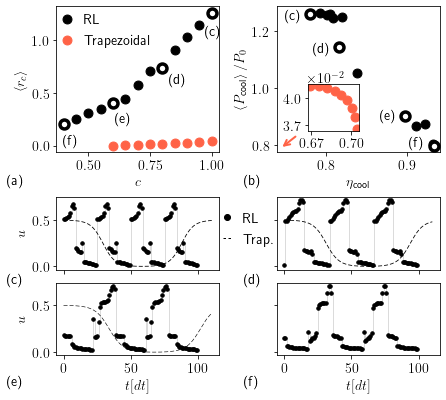

In [43]:
main_dir = "../paper_plot_data/qubit_refrigerator/pareto/"

rl_pareto_file = os.path.join(main_dir, "det_pareto.txt" )
otto_pareto_file = os.path.join(main_dir, "otto_pareto.txt")
cycle_0_file = os.path.join(main_dir, "2022_01_27-17_40_09_aend=1.0/saved_policies/det_policy.txt")
cycle_1_file = os.path.join(main_dir, "2022_01_28-10_06_53_aend=0.8/saved_policies/det_policy.txt")
cycle_2_file = os.path.join(main_dir, "2022_01_28-15_42_10_aend=0.6/saved_policies/det_policy.txt")
cycle_3_file = os.path.join(main_dir, "2022_01_21-18_39_30_aend=0.4/saved_policies/det_policy.txt")
selected_cycle_cvals = [1.,0.8,0.6,0.4]
actions_to_plot_0 = 100 
actions_to_plot_1 = actions_to_plot_0 
actions_to_plot_2 = actions_to_plot_0
actions_to_plot_3 = actions_to_plot_0
actions_line_style = "scatter_plot"
marker_size=80
actions_ylim = None
prot_linewidth = 12
extra_cycles_linewidth = 1.5
custom_colors=["black"]
inset_position = [0.687,0.675,0.12,0.12]
extra_cycles_0 = [lambda x,a=2,omega=0.05475,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_0 = 0.8
extra_cycles_1 = [lambda x,a=2,omega=0.0512239,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_1 = 0.8
extra_cycles_2 = [lambda x,a=2,omega=0.0472428,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_2 = 0.6
rl_legend_lines=[Line2D([0], [0], color='black', linewidth=0, marker="o"), 
                    Line2D([0], [0], color='black', linewidth=1, dashes=(2/0.8,2/0.8))]
rl_legend_text=["RL","Trap."]
rl_legend_location=[0.487,0.37]
legend_column_spacing = 0.5
plot_file_name = "fig_4.pdf"

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath,amssymb,physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,5.45))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios = [1.8,0.9,0.9])
figmerit_ax = fig.add_subplot(gs[0, 0])
pareto_ax = fig.add_subplot(gs[0, 1])
prot_0_ax = fig.add_subplot(gs[1, 0])
prot_1_ax = fig.add_subplot(gs[1, 1],sharey=prot_0_ax)
prot_2_ax = fig.add_subplot(gs[2, 0],sharex=prot_0_ax)
prot_3_ax = fig.add_subplot(gs[2, 1],sharey=prot_2_ax, sharex=prot_1_ax)
plt.setp(prot_1_ax.get_yticklabels(), visible=False)
plt.setp(prot_3_ax.get_yticklabels(), visible=False)          
plt.setp(prot_0_ax.get_xticklabels(), visible=False)
plt.setp(prot_1_ax.get_xticklabels(), visible=False)          

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#load pareto data
rl_data = np.loadtxt(rl_pareto_file)
otto_data = np.loadtxt(otto_pareto_file)
chosen_masks = np.full((4,) + rl_data[:,quantity_ind["a"]].shape, False)
not_chosen_mask = np.full( rl_data[:,quantity_ind["a"]].shape, False)
for i, cval in enumerate(selected_cycle_cvals):
    chosen_masks[i,:] = np.logical_or(chosen_masks[i,:], np.isclose(rl_data[:,quantity_ind["a"]], cval))
    not_chosen_mask = np.logical_or(not_chosen_mask,chosen_masks[i,:])
not_chosen_mask = np.logical_not(not_chosen_mask)

#Figure of merit (panel a)
figmerit_ax.scatter(rl_data[not_chosen_mask,quantity_ind["a"]], rl_data[not_chosen_mask,quantity_ind["h"]],
                    s=marker_size, marker="o", label="RL",c=custom_colors[0])
figmerit_ax.scatter(otto_data[:,quantity_ind["a"]], otto_data[:,quantity_ind["h"]], s=marker_size,
                    marker="o",label="Trapezoidal",c="tomato")
for i in range(len(selected_cycle_cvals)):
    figmerit_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["a"]],rl_data[chosen_masks[i,:],quantity_ind["h"]],
                      s=marker_size, marker="o",c="white",linewidths=3.5, edgecolors=custom_colors[0])    
figmerit_ax.set_xlabel(r"$c$")
figmerit_ax.set_ylabel(r"$\ev{r_c}$")
figmerit_ax.legend(framealpha=0., borderaxespad=0, handlelength=0.8)

#Pareto front (panel b)
pareto_ax.scatter(rl_data[not_chosen_mask,quantity_ind["eff"]],rl_data[not_chosen_mask,quantity_ind["pow"]],
                  s=marker_size, marker="o", label="RL",c=custom_colors[0])
for i in range(len(selected_cycle_cvals)):
    pareto_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["eff"]],rl_data[chosen_masks[i,:],quantity_ind["pow"]],
                      s=marker_size, marker="o",c="white",linewidths=3.5, edgecolors=custom_colors[0])
pareto_ax.set_xlabel(r"$\eta_{\text{cool}}$")
pareto_ax.set_ylabel(r"$\ev*{P_\text{cool}}/P_0$")
pareto_ax.set_xlim([0.74, 0.94])
pareto_ax.annotate('',xytext=(0.765,0.835),xycoords='data',xy=(0.745,0.79),textcoords='data',size=14,
                   arrowprops=dict(arrowstyle='->',linewidth=2.,color='tomato'))

#Pareto fronnt inset (inset in panel b)
pareto_inset = fig.add_axes(inset_position)
pareto_inset.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) 
pareto_inset.scatter(otto_data[:,quantity_ind["eff"]],otto_data[:,quantity_ind["pow"]], s=marker_size,
                  marker="o", label="Otto",c="tomato")
pareto_inset.set_xticks([0.67,0.7])
pareto_inset.set_yticks([3.7e-2,4.0e-2])


#first protocol (panel c)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot_0,custom_colors=custom_colors,
                                is_tri=False,k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_0,
                                extra_cycles_linewidth=extra_cycles_linewidth_0,hide_gray_vertical_line=False,
                                hide_xaxis_label=True,line_style=actions_line_style)

#second protocol (panel d)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot_1,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_1,
                                extra_cycles_linewidth=extra_cycles_linewidth_1,hide_gray_vertical_line=False,
                                hide_xaxis_label=True,hide_yaxis_label=True,line_style=actions_line_style)

#second protocol (panel e)
plotting.plot_actions_on_axis(cycle_2_file, prot_2_ax, actions_to_plot=actions_to_plot_2,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_2,
                                extra_cycles_linewidth=extra_cycles_linewidth_2,hide_gray_vertical_line=False,
                                line_style=actions_line_style)

#second protocol (panel f)
plotting.plot_actions_on_axis(cycle_3_file, prot_3_ax, actions_to_plot=actions_to_plot_3,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",hide_gray_vertical_line=False,
                                hide_yaxis_label=True,line_style=actions_line_style)

#legend
fig.legend(rl_legend_lines,rl_legend_text,loc=rl_legend_location,fancybox=False, framealpha=0.,borderaxespad=0.,
                    ncol=1,handlelength=0.6, columnspacing=legend_column_spacing)

#extra labels
figmerit_ax.text(0.04,0.05, r"(f)", transform=figmerit_ax.transAxes)
figmerit_ax.text(0.36,0.20, r"(e)", transform=figmerit_ax.transAxes)
figmerit_ax.text(0.69,0.47, r"(d)", transform=figmerit_ax.transAxes)
figmerit_ax.text(0.91,0.8, r"(c)", transform=figmerit_ax.transAxes)
pareto_ax.text(0.81,0.04, r"(f)", transform=pareto_ax.transAxes)
pareto_ax.text(0.632,0.22, r"(e)", transform=pareto_ax.transAxes)
pareto_ax.text(0.22,0.68, r"(d)", transform=pareto_ax.transAxes)
pareto_ax.text(0.05,0.91, r"(c)", transform=pareto_ax.transAxes)

# panel numbering labels
fig.text(-0.3,-0.22, r"(a)",transform=figmerit_ax.transAxes)
fig.text(-0.2,-0.22, r"(b)",transform=pareto_ax.transAxes)
fig.text(-0.3,-0.19, r"(c)",transform=prot_0_ax.transAxes)
fig.text(-0.2,-0.19, r"(d)",transform=prot_1_ax.transAxes)
fig.text(-0.3,-0.42, r"(e)",transform=prot_2_ax.transAxes)
fig.text(-0.2,-0.42, r"(f)",transform=prot_3_ax.transAxes)

#save figure
plt.savefig(plot_file_name)
#show
plt.show()

## Produce Fig. 8

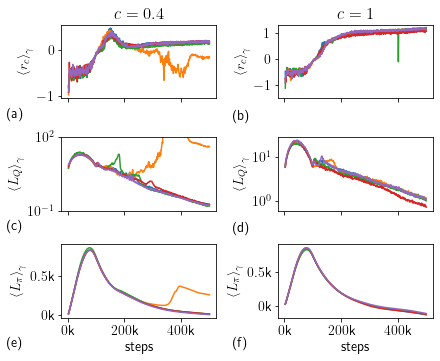

In [13]:
#folders containing the log folders
left_panel_dir = "../paper_plot_data/qubit_refrigerator/5_extra_runs/0.4"
right_panel_dir = "../paper_plot_data/qubit_refrigerator/5_extra_runs/1.0"

#in the following, first index is left panel, second index is right panel
skip_lines = 2
reward_ylim = [None,[-1.5, 1.3]]
reward_ylabel= [r"$\ev*{r_c}_\gamma$", r"$\ev*{r_c}_\gamma$"]
y_ticks = [[[0.1,100],None],[[1,10],None]] 
custom_colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
y_lims = [[[0.1,100],None],[None,None]] 
reward_yticks = [None,None] 
plot_file_location = "fig_8.pdf"

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,4.9))
gs = gridspec.GridSpec(3, 2, figure=fig)
reward_ax = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])]
q_loss_ax = [fig.add_subplot(gs[1, 0],sharex=reward_ax[0]), fig.add_subplot(gs[1, 1],sharex=reward_ax[1])]
pi_loss_ax = [fig.add_subplot(gs[2, 0],sharex=reward_ax[0]), fig.add_subplot(gs[2, 1],sharex=reward_ax[1])]
plt.setp(reward_ax[0].get_xticklabels(), visible=False)          
plt.setp(reward_ax[1].get_xticklabels(), visible=False)          
plt.setp(q_loss_ax[0].get_xticklabels(), visible=False)          
plt.setp(q_loss_ax[1].get_xticklabels(), visible=False)          

#create lists with all the log folders (first index left panel, second index right panel)
running_reward_files = [[],[]]
running_loss_files = [[],[]]
for (i, main_dir) in enumerate([left_panel_dir,right_panel_dir]):
    for sub_dir in os.listdir(main_dir):
        running_reward_file, running_loss_file, _, _ = \
            plotting.log_sac_file_locations(os.path.join(main_dir,sub_dir),None,None,None,None)
        running_reward_files[i].append(running_reward_file)
        running_loss_files[i].append(running_loss_file)
    
#loop over left and right panel
for i in range(2):
    #loop over each training curve
    for j, (running_reward_file, running_loss_file) in enumerate(zip(running_reward_files[i],running_loss_files[i])): 
        #running reward panel
        plotting.plot_running_reward_on_axis(running_reward_file, reward_ax[i],ylim=reward_ylim[i],skip_lines=skip_lines,
            custom_colors=[custom_colors[j]], ylabel=reward_ylabel[i], yticks=reward_yticks[i], xlabel="")
        #running losses panel
        plotting.plot_running_loss_on_axis(running_loss_file, (q_loss_ax[i], pi_loss_ax[i]), x_labels=["", "steps"],
            y_labels=[r"$\ev*{L_Q}_\gamma$", r"$\ev*{L_\pi}_\gamma$"], y_k_notations=[False, True], y_ticks=y_ticks[i],
            custom_colors=[custom_colors[j] for _ in range(2)], y_lims = y_lims[i], skip_lines=skip_lines, is_tri=False)

#add title at the top
reward_ax[0].set_title(r"$c=0.4$")
reward_ax[1].set_title(r"$c=1$")
    
#add the panel labels
reward_ax[0].text(-0.35,-0.27, r'{(a)}', transform=reward_ax[0].transAxes)
reward_ax[1].text(-0.29,-0.3, r'{(b)}', transform=reward_ax[1].transAxes)
q_loss_ax[0].text(-0.35,-0.27, r'{(c)}', transform=q_loss_ax[0].transAxes)
q_loss_ax[1].text(-0.29,-0.3, r'{(d)}', transform=q_loss_ax[1].transAxes)
pi_loss_ax[0].text(-0.35,-0.4, r'{(e)}', transform=pi_loss_ax[0].transAxes)
pi_loss_ax[1].text(-0.29,-0.4, r'{(f)}', transform=pi_loss_ax[1].transAxes)
        
#save file
plt.savefig(plot_file_location)
#show
plt.show()